# Summer 2022 Data Science Intern Challenge 

Please complete the following questions, and provide your thought process/work. You can attach your work in a text file, link, etc. on the application page. Please ensure answers are easily visible for reviewers!


Question 1: Given some sample data, write a program to answer the following: click here to access the required data set

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?


Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

How many orders were shipped by Speedy Express in total?
What is the last name of the employee with the most orders?
What product was ordered the most by customers in Germany?


https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL

## Question 1

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [83]:
! ls


2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv
Untitled.ipynb


In [84]:
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [85]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [87]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [88]:
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [89]:
df.duplicated().sum()

0

<AxesSubplot:>

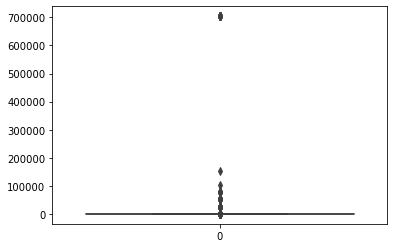

In [104]:
sns.boxplot(data=df['order_amount'])

In [90]:
df['price_per_item'] = df['order_amount']/df['total_items']
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0


In [182]:
set(list(df['price_per_item']))

{90.0,
 94.0,
 101.0,
 111.0,
 112.0,
 114.0,
 116.0,
 117.0,
 118.0,
 122.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 136.0,
 138.0,
 140.0,
 142.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 153.0,
 154.0,
 155.0,
 156.0,
 158.0,
 160.0,
 161.0,
 162.0,
 163.0,
 164.0,
 165.0,
 166.0,
 168.0,
 169.0,
 171.0,
 172.0,
 173.0,
 176.0,
 177.0,
 178.0,
 181.0,
 184.0,
 187.0,
 190.0,
 193.0,
 195.0,
 196.0,
 201.0,
 352.0,
 25725.0}

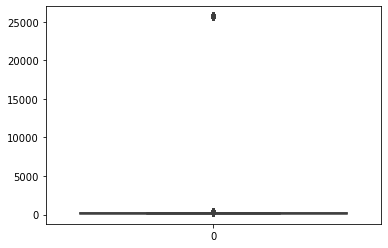

In [92]:
sns.boxplot(data = df['price_per_item']);

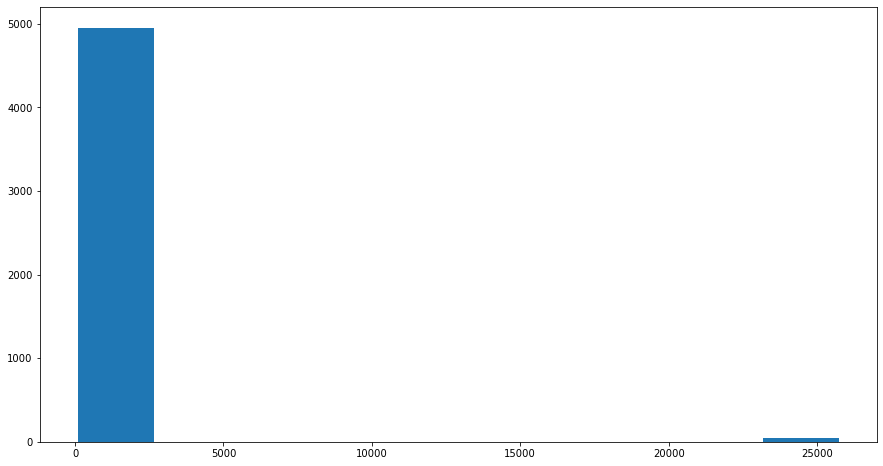

In [143]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(df['price_per_item']);

In [142]:
price_per_item_outliers = df[df['price_per_item'] > 400]
price_per_item_outliers

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


<AxesSubplot:>

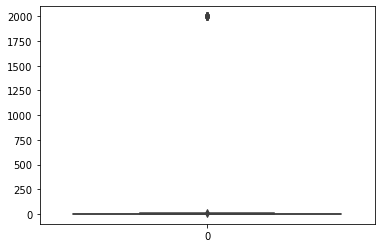

In [128]:
sns.boxplot(data = df['total_items'])

In [131]:
df['total_items'].value_counts(ascending=False)

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

In [141]:
total_items_outliers = df[df['total_items'] > 10]
total_items_outliers

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


In [169]:
data_clean = df[df['price_per_item'] < 500] #removing high priced item outliers
data_clean = df[df['total_items'] < 10] #removing high order count outliers
data_clean

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0


In [170]:
data_clean['total_items'].value_counts()

2    1832
1    1830
3     941
4     293
5      77
6       9
8       1
Name: total_items, dtype: int64

In [171]:
avg_df = data_clean.groupby(by=['shop_id']).mean()
avg_df

,order_id,user_id,order_amount,total_items,price_per_item
shop_id,,,,,
1,2514.568182,833.613636,308.818182,1.954545,158.0
2,2299.054545,861.272727,174.327273,1.854545,94.0
3,2305.875000,847.708333,305.250000,2.062500,148.0
4,2747.607843,866.450980,258.509804,2.019608,128.0
5,2498.288889,862.222222,290.311111,2.044444,142.0
...,...,...,...,...,...
96,2496.176471,865.411765,330.000000,2.156863,153.0
97,2508.604167,844.625000,324.000000,2.000000,162.0
98,2470.862069,866.793103,245.362069,1.844828,133.0


In [172]:
aov = avg_df['order_amount'].mean()
print(f'The average order value for sneakers within reasonable price(<$500.00) over 30-days is ${round(aov, 2)}')

The average order value for sneakers within reasonable price(<$500.00) over 30-days is $792.34


The issue with the calculation including the outliers within the calculation. The same metric can be used after cleaning the data. Because of the outliers, the average value is highly skewed to 3,145.13 dollars. Without the outliers, the mistakenly priced item at 25,725.00 dollars and the extremely high order count of 2,000 items per order with a total order value of 704,000.00 dollars per, the average order value is 792.34 dollars.

## Question 2


Question 2: For this question you’ll need to use SQL. Follow this link to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

- How many orders were shipped by Speedy Express in total?
- What is the last name of the employee with the most orders?
- What product was ordered the most by customers in Germany?


A. Speedy Express shipped 54 orders total

B. The last name of the employee with the most orders is "Peacock"

C. The product ordered by the most customers in Germany is Boston Crab Meat